In [358]:
import cv2
from skimage.filters import apply_hysteresis_threshold
from skimage.filters import frangi, hessian,prewitt, roberts, sobel, prewitt_h, prewitt_v
from skimage.filters import gabor, gaussian, laplace, median, meijering
from skimage.filters import rank_order,threshold_local,threshold_niblack
from skimage.filters import threshold_otsu,threshold_sauvola,threshold_triangle
from skimage.filters import threshold_yen, unsharp_mask, wiener
from skimage.restoration import denoise_nl_means, denoise_bilateral
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk
from skimage import exposure

In [2]:
#el método --frangi-- detecta los bordes continuos de una imagen
#el método --gaussian-- el eficiente pero difumina la imagen, si podemos resaltar los bordes??
#el método --median-- deja moteada la imagen
#el mpetodo --meijering-- detecta los bordes, análogo al --frangi--
#el mpetodo --sato-- detecta los bordes, análogo al --frangi--
#el método --threshold_isodata-- crea una imagen binaria
#el método --unsharp_mask-- resalta los pixeles

In [3]:
imagen = cv2.imread("42original.png", cv2.IMREAD_GRAYSCALE)
kernel=9

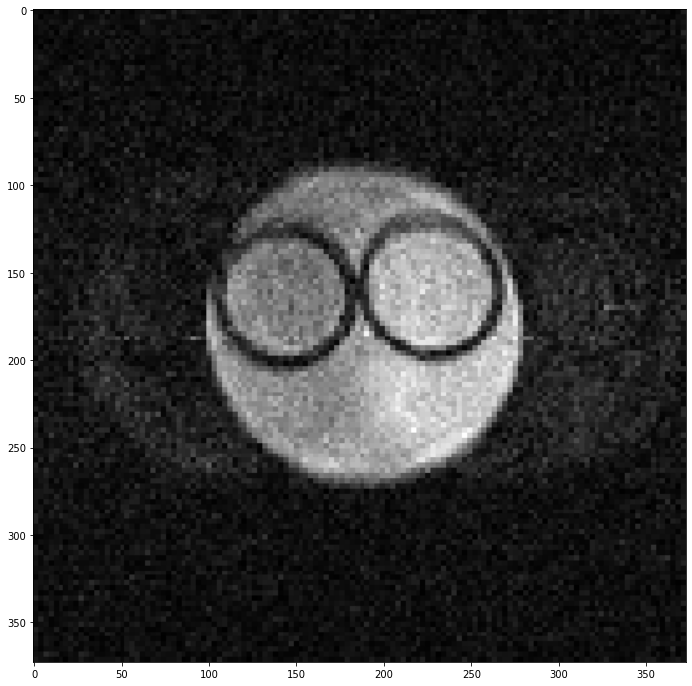

In [355]:
plt.figure(figsize=(12,12))
plt.imshow(imagen,cmap='gray')
plt.show()

In [400]:
def chain_1(image, sigma=2):
    """
    esta función toma una imagen en escala de grises y le aplica el filtro gaussiano, el mediano, unsharp 
    para resaltar bordes y un NLM
    """
    A = gaussian(image, sigma)
    B = median(A, disk(3))
    C = np.around(unsharp_mask(B, radius=5, amount=7),2)
    D = denoise_nl_means(C,patch_size=15, patch_distance=20, h=0.19,preserve_range=False)
    E = denoise_nl_means(D,patch_size=15, patch_distance=20, h=0.19,preserve_range=False)
    
    return E

In [406]:
def chain_2(image, sigma=2):
    """
    función que aplica el filtro bilateral, NLM, unsharp y otra iteración del NLM
    """
    A = cv2.bilateralFilter(image,5,50,50)
    B = denoise_nl_means(A,patch_size=10, patch_distance=10, h=0.1,preserve_range=False)
    C = np.around(unsharp_mask(B, radius=10, amount=10),2)
    D = denoise_nl_means(C,patch_size=15, patch_distance=20, h=0.19)
    E = median(D)
    
    return E

In [ ]:
def chain_3(image, sigma):
    
    A = restoration.denoise_tv_bregman(image, weight=15, max_iter=1, eps=0.001, isotropic=True)
    B = denoise_nl_means(A,patch_size=25, patch_distance=25, h=0.1,preserve_range=False)
    C = denoise_nl_means(B,patch_size=3, patch_distance=3, h=0.09,preserve_range=False)
    D = np.around(unsharp_mask(C, radius=4, amount=4),2)
    
    return D

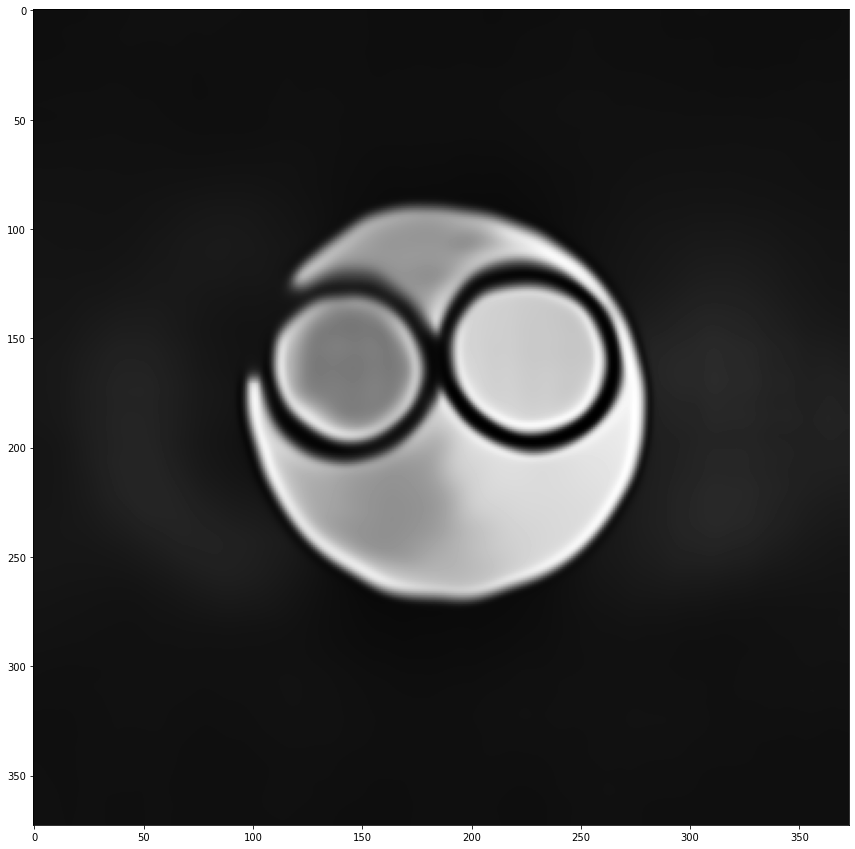

In [409]:
plt.figure(figsize=(15,15))
plt.imshow(chain_1(imagen),cmap='gray')
plt.show()